<a href="https://colab.research.google.com/github/praveenkumarr123/hello-world/blob/master/APPLE_STOCK_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
### Keras and Tensorflow >2.0

In [ ]:
### Data Collection
import pandas_datareader as pdr
key=""

In [ ]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [29]:
df.to_csv('AAPL.csv')

In [30]:
import pandas as pd

In [82]:
df=pd.read_csv('AAPL (1).csv')

In [83]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-05-27,32.584999,33.064999,32.512501,33.009998,30.270010,183332800
1,2015-05-28,32.965000,32.987499,32.775002,32.945000,30.210407,122933200
2,2015-05-29,32.807499,32.862499,32.474998,32.570000,29.866539,203538000
3,2015-06-01,32.570000,32.847500,32.512501,32.634998,29.926142,128451200
4,2015-06-02,32.465000,32.665001,32.330002,32.490002,29.793186,134670400


In [146]:
df.tail(30)

,Date,Open,High,Low,Close,Adj Close,Volume
1247,2020-05-08,76.410004,77.587502,76.072502,77.532501,77.144394,134048000
1248,2020-05-11,77.025002,79.262497,76.809998,78.752502,78.358284,145946400
1249,2020-05-12,79.457497,79.922501,77.727501,77.852501,77.462791,162301200
1250,2020-05-13,78.037498,78.987503,75.802498,76.912498,76.527496,200622400
1251,2020-05-14,76.127502,77.447502,75.382500,77.385002,76.997635,158929200
1252,2020-05-15,75.087502,76.974998,75.052498,76.927498,76.542412,166348400
1253,2020-05-18,78.292503,79.125000,77.580002,78.739998,78.345848,135372400
1254,2020-05-19,78.757500,79.629997,78.252502,78.285004,77.893127,101729600
1255,2020-05-20,79.169998,79.879997,79.129997,79.807503,79.408005,111504800
1256,2020-05-21,79.665001,80.222504,78.967499,79.212502,78.815979,102688800


In [85]:
df1=df.reset_index()['Close']

In [86]:
df1

0       33.009998
1       32.945000
2       32.570000
3       32.634998
4       32.490002
          ...    
1272    85.747498
1273    88.019997
1274    87.897499
1275    87.932503
1276    87.430000
Name: Close, Length: 1277, dtype: float64

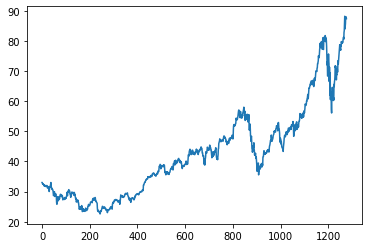

In [87]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [88]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [89]:
import matplotlib.pyplot as plt
import numpy as np


In [90]:
df1

0       33.009998
1       32.945000
2       32.570000
3       32.634998
4       32.490002
          ...    
1272    85.747498
1273    88.019997
1274    87.897499
1275    87.932503
1276    87.430000
Name: Close, Length: 1277, dtype: float64

In [91]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [126]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df6 = pd.DataFrame(df1)
df6.tail(20)

,0
1257,0.870667
1258,0.862438
1259,0.867695
1260,0.868229
1261,0.867048
1262,0.881943
1263,0.887619
1264,0.894400
1265,0.883733
1266,0.918705


In [93]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [94]:
training_size,test_size

(830, 447)

In [95]:
train_data

array([[0.15885713],
       [0.15786668],
       [0.1521524 ],
       [0.15314284],
       [0.15093338],
       [0.15154286],
       [0.14864763],
       [0.14594284],
       [0.14270479],
       [0.14125716],
       [0.14681908],
       [0.14571429],
       [0.14030478],
       [0.1393524 ],
       [0.14194287],
       [0.14080003],
       [0.14300952],
       [0.13813335],
       [0.14198097],
       [0.13977144],
       [0.14388573],
       [0.14156192],
       [0.13870478],
       [0.13024763],
       [0.13367621],
       [0.13813335],
       [0.13752384],
       [0.13584763],
       [0.1346667 ],
       [0.12278097],
       [0.11325716],
       [0.12548573],
       [0.13455241],
       [0.13436192],
       [0.13897144],
       [0.14540952],
       [0.1496381 ],
       [0.15897147],
       [0.15394287],
       [0.13287621],
       [0.13264765],
       [0.13013335],
       [0.12354286],
       [0.12586667],
       [0.12438095],
       [0.12201908],
       [0.11794289],
       [0.107

In [96]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [97]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [98]:
print(X_train.shape), print(y_train.shape)

(729, 100)
(729,)


(None, None)

In [99]:
print(X_test.shape), print(ytest.shape)

(346, 100)
(346,)


(None, None)

In [100]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [101]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [102]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [103]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [104]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 310ms/step - loss: 0.0306 - val_loss: 0.0428
Epoch 2/100
12/12 [==============================] - 3s 206ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 3/100
12/12 [==============================] - 2s 202ms/step - loss: 0.0017 - val_loss: 0.0033
Epoch 4/100
12/12 [==============================] - 2s 197ms/step - loss: 6.6687e-04 - val_loss: 0.0044
Epoch 5/100
12/12 [==============================] - 2s 200ms/step - loss: 6.1279e-04 - val_loss: 0.0040
Epoch 6/100
12/12 [==============================] - 2s 208ms/step - loss: 5.3301e-04 - val_loss: 0.0029
Epoch 7/100
12/12 [==============================] - 2s 211ms/step - loss: 4.4935e-04 - val_loss: 0.0029
Epoch 8/100
12/12 [==============================] - 2s 200ms/step - loss: 4.7504e-04 - val_loss: 0.0028
Epoch 9/100
12/12 [==============================] - 3s 223ms/step - loss: 4.6102e-04 - val_loss: 0.0028
Epoch 10/100
12/12 [==============================] - 2s 202ms/step

In [105]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [106]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [107]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

35.91897666811169

In [108]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

61.953376571642124

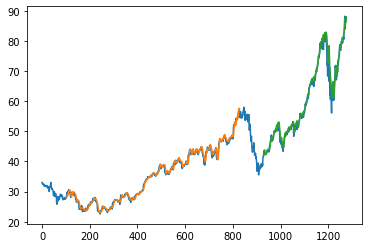

In [109]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [110]:
len(test_data)

447

In [112]:
x_input=test_data[347:].reshape(1,-1)
x_input.shape


(1, 100)

In [113]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [114]:
temp_input

[0.8914285714285712,
 0.8896380952380953,
 0.8349333790476192,
 0.8316952685714285,
 0.8705143314285715,
 0.8804191085714286,
 0.8947428419047618,
 0.8750095390476189,
 0.8807999695238093,
 0.873409478095238,
 0.9023238704761904,
 0.893447619047619,
 0.893752441904762,
 0.8710857295238095,
 0.8886857142857143,
 0.8760380647619046,
 0.848419017142857,
 0.7917714133333331,
 0.7532952076190476,
 0.7707047466666666,
 0.697828540952381,
 0.6972190019047619,
 0.7941714285714285,
 0.7580190933333335,
 0.8091428419047617,
 0.7717333942857141,
 0.7569143009523809,
 0.6698286323809524,
 0.7428571428571427,
 0.7051047466666664,
 0.6014857142857144,
 0.7147809676190477,
 0.5785524266666668,
 0.6191238247619049,
 0.5955428723809524,
 0.5883428723809523,
 0.5291428876190476,
 0.510590476190476,
 0.5963428876190477,
 0.5911619352380952,
 0.6403809828571427,
 0.5996190780952382,
 0.626552380952381,
 0.6245714133333333,
 0.5736000304761906,
 0.5889142704761905,
 0.5755047923809524,
 0.6557333485714287,

In [115]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[1.0143393]
101
1 day input [0.8896381  0.83493338 0.83169527 0.87051433 0.88041911 0.89474284
 0.87500954 0.88079997 0.87340948 0.90232387 0.89344762 0.89375244
 0.87108573 0.88868571 0.87603806 0.84841902 0.79177141 0.75329521
 0.77070475 0.69782854 0.697219   0.79417143 0.75801909 0.80914284
 0.77173339 0.7569143  0.66982863 0.74285714 0.70510475 0.60148571
 0.71478097 0.57855243 0.61912382 0.59554287 0.58834287 0.52914289
 0.51059048 0.59634289 0.59116194 0.64038098 0.59961908 0.62655238
 0.62457141 0.57360003 0.58891427 0.57550479 0.65573335 0.64415237
 0.66944766 0.67676189 0.69680002 0.7493714  0.73939046 0.74800003
 0.73318092 0.71081903 0.67820952 0.70765719 0.70358097 0.73382859
 0.73459054 0.71710473 0.75196197 0.77508568 0.75706671 0.77264765
 0.78940952 0.80110479 0.81295237 0.83729527 0.85588576 0.84217146
 0.8278476  0.83504766 0.82807618 0.85569522 0.84876198 0.87196197
 0.86289528 0.87066674 0.86243816 0.86769519 0.86822859 0.86704765
 0.8819429  0.88761905 0.8944     

In [116]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [117]:
import matplotlib.pyplot as plt

In [118]:
len(df1)

1277

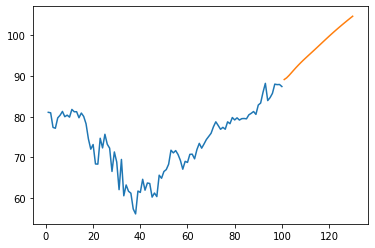

In [131]:
plt.plot(day_new,scaler.inverse_transform(df1[1177:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

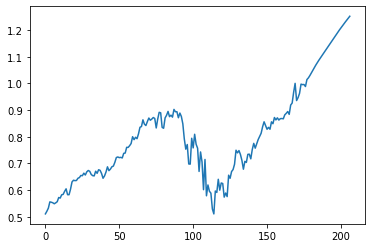

In [135]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1100:])

In [136]:
df3=scaler.inverse_transform(df3).tolist()

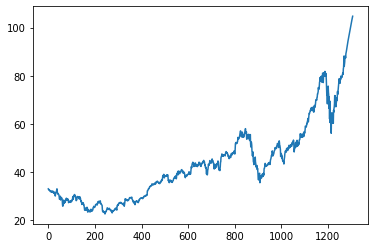

In [137]:
plt.plot(df3)

In [130]:
df3

[[33.009997999999996],
 [32.945],
 [32.57],
 [32.634997999999996],
 [32.490002000000004],
 [32.529999],
 [32.34],
 [32.162498],
 [31.950001],
 [31.855],
 [32.220001],
 [32.147498999999996],
 [31.7925],
 [31.73],
 [31.9],
 [31.825001],
 [31.969998999999998],
 [31.65],
 [31.9025],
 [31.7575],
 [32.0275],
 [31.875],
 [31.6875],
 [31.1325],
 [31.3575],
 [31.65],
 [31.610001],
 [31.5],
 [31.422501],
 [30.6425],
 [30.0175],
 [30.82],
 [31.415001],
 [31.4025],
 [31.705],
 [32.127499],
 [32.404999],
 [33.017502],
 [32.6875],
 [31.305],
 [31.290001],
 [31.125],
 [30.692498999999998],
 [30.844998999999998],
 [30.747498999999998],
 [30.592501000000002],
 [30.325001],
 [29.610001],
 [28.66],
 [28.85],
 [28.782498999999998],
 [28.879998999999998],
 [29.93],
 [28.372498999999998],
 [28.809998999999994],
 [28.7875],
 [28.99],
 [29.290001],
 [29.125],
 [28.752501000000002],
 [28.1625],
 [26.440001000000002],
 [25.780001000000002],
 [25.934998999999998],
 [27.422501],
 [28.23],
 [28.3225],
 [28.1900010

In [139]:
DF3 = pd.DataFrame(df3)

In [147]:
DF3.tail(30)

,0
1277,89.151017
1278,89.561300
1279,90.136330
1280,90.785390
1281,91.445801
1282,92.088924
1283,92.705158
1284,93.293839
1285,93.858699
1286,94.405902
